In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/data_features.csv')
data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,excl_quest_sign_count,contractions_count,...,"('VBN', 'IN')","('VBG', 'VBN')","(',', 'WDT')","('RB', 'RB')","('RB', 'VBN')","('VBG', 'IN')","('CC', 'VBG')","('VBZ', 'PRP')","('WDT', 'MD')","('NN', 'NNS')"
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,16,...,0.000000,0.0,0.000000,0.003774,0.000000,0.003774,0.000000,0.011321,0.000000,0.000000
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,0,17,...,0.003704,0.0,0.000000,0.000000,0.001852,0.000000,0.001852,0.000000,0.000000,0.001852
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,0,21,...,0.000000,0.0,0.002967,0.000000,0.000000,0.000000,0.000000,0.002967,0.000000,0.000000
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,0,54,...,0.003750,0.0,0.000000,0.000000,0.001250,0.005000,0.000000,0.005000,0.000000,0.000000
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,0,3,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004274,0.000000


In [3]:
data.shape

(3911, 110)

In [4]:
data.drop(['paragraphs', 'sentences', 'tags', 'text_id', 'full_text'], axis=1, inplace=True)

In [5]:
def min_max_scale(feature_data):
    columns = ['excl_quest_sign_count',
       'contractions_count', 'capitalized_mistakes', 'word_count',
       'sentence_count', 'paragraphs', 'paragraph_count',
       'avg_word_count_per_paragraph', 'avg_sentence_count_per_paragraph',
       'has_short_paragraphs', 'difficult_word_count',
       'spelling_mistake_count', 'spelling_mistakes_percent',
       'unique_linking_words_count', 'percentage_of_unique_words',
       'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld',
       'average_punctuation', 'punct_mistake', 'sentiment_compound',
       'word_length_avg', 'digits_counter', 'repeats_bigram_percent',
       'repeats_trigram_percent', 'repeats_fourgram_percent', 'verbs_count',
       'nouns_count', 'adjectives_count', 'adverbs_count', 'articles_count',
       'modal_count', 'ielts_phrases_count', 'phrasal_verbs_count',
       'avg_word_count_per_sentence', 'count_chars', 'count_words_in_quotes',
       'sentiment_difference_sentence', 'sentiment_difference_paragraph',
       'sentences', 'boilerplate', 'specificity', 'verb_tense_count_percent']
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(feature_data[columns])

    scaled_data = pd.DataFrame(scaled_data, columns=columns)
    scaled_data = pd.merge(feature_data[['text_id', 'full_text', 'paragraphs']], scaled_data, left_index=True, right_index=True)
    
    return scaled_data

In [5]:
def mcrmse(y_test, y_pred):
    rmse_per_column = []
    for idx, col in enumerate(y_test):
        rmse = (((y_pred[idx] - y_test[col]) ** 2).mean()) ** 0.5
        rmse_per_column.append(rmse)
        
    return sum(rmse_per_column)/len(y_pred)

In [6]:
def run_model(X_train, X_test, y_train, y_test, model):
    y_pred = []
    for col in y_train.columns:
        model.fit(X_train, y_train[col])
        y_pred.append(model.predict(X_test))
    return mcrmse(y_test, y_pred)

# Select From Model

In [19]:
from sklearn.feature_selection import SelectFromModel

## Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [37]:
print(X_train.shape)
print(X_test.shape)

(3128, 99)
(783, 99)


In [38]:
embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=60)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

32 selected features
['capitalized_mistakes', 'sentence_count', 'avg_word_count_per_paragraph', 'avg_sentence_count_per_paragraph', 'spelling_mistakes_percent', 'percentage_of_unique_words', 'mtld', 'sentiment_compound', 'word_length_avg', 'verbs_count', 'nouns_count', 'adjectives_count', 'adverbs_count', 'articles_count', 'modal_count', 'avg_word_count_per_sentence', 'boilerplate', 'specificity', 'sentence_variance', 'avg_cos_similarity', "('MD', 'VB')", "('PRP', 'VBP')", "('IN', 'NNS')", "('IN', 'VBG')", "('NNS', 'IN')", "('MD', 'RB')", "('VBG', 'DT')", "('NN', ',')", "('PRP$', 'NNS')", "('RB', 'IN')", "('JJ', 'NNS')", "('RB', 'RB')"]


### Run a Simple model

In [51]:
rf = RandomForestRegressor(n_estimators=100)
y_pred = []

for col in y_train.columns:
    rf.fit(X_train, y_train[col])
    y_pred.append(rf.predict(X_test))

<BarContainer object of 99 artists>

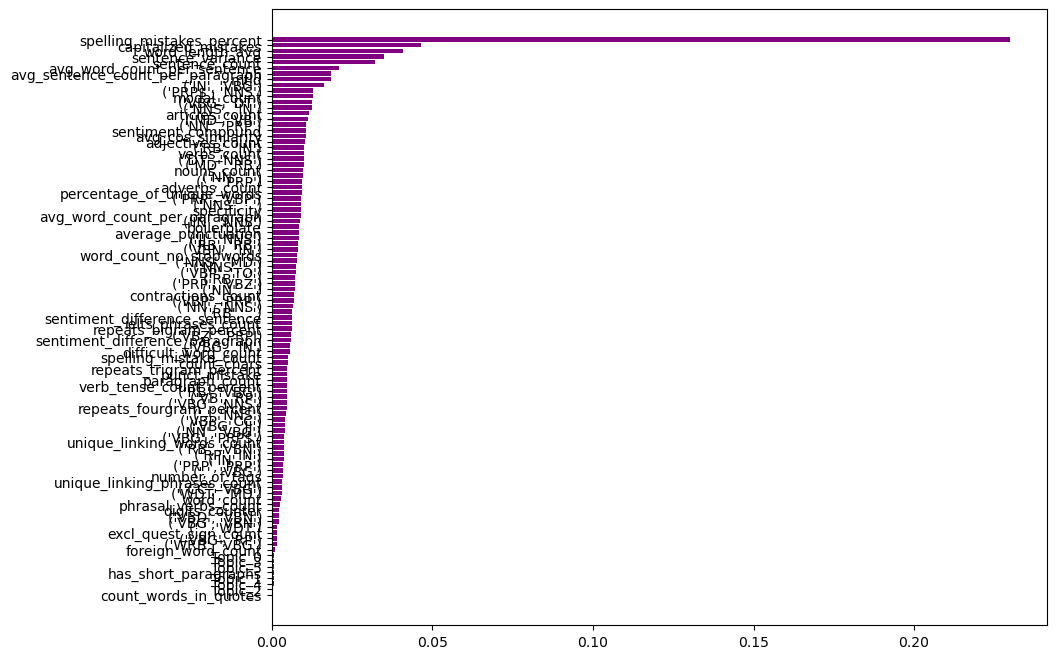

In [52]:
import matplotlib.pyplot as plt

features_sorted = []
importance_sorted = []

unsorted_list = [(importance, feature) for feature, importance in 
                  zip(X.columns, rf.feature_importances_)]
sorted_list = sorted(unsorted_list)

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importance_sorted, color='purple')

In [53]:
mcrmse(y_test, y_pred)

0.5395599650432791

### Run a model with selected features

In [39]:
X = data[embeded_rf_feature]

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [41]:
run_model(X_train, X_test, y_train, y_test, RandomForestRegressor(n_estimators=100))

0.5471313530878862

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [45]:
X.shape

(3911, 99)

In [46]:
embeded_lr_selector = SelectFromModel(LinearRegression(), max_features=60)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

29 selected features
['average_punctuation', 'modal_count', 'specificity', 'verb_tense_count_percent', 'foreign_word_count', "('MD', 'VB')", "('NN', 'VBG')", "('PRP', 'PRP')", "('PRP', 'VBZ')", "('RP', 'IN')", "('VBG', 'RP')", "('VBP', 'CC')", "('VBD', 'VBN')", "('MD', 'RB')", "('VBG', 'DT')", "(',', 'VBG')", "('PRP$', 'NNS')", "('IN', '.')", "('VBG', 'PRP$')", "('RB', 'IN')", "('WRB', 'VBG')", "('VBN', 'IN')", "('VBG', 'VBN')", "(',', 'WDT')", "('RB', 'RB')", "('RB', 'VBN')", "('VBZ', 'PRP')", "('WDT', 'MD')", "('NN', 'NNS')"]


In [47]:
run_model(X_train, X_test, y_train, y_test, LinearRegression())

0.5230032372760702

### Selected features

In [48]:
X_ = data[embeded_lr_feature]

y_ = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=100, test_size=0.2)

In [50]:
run_model(X_train, X_test, y_train, y_test, LinearRegression())

0.5916093328841097

## Lasso Regression

In [17]:
from sklearn.linear_model import Lasso

In [18]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [21]:
embeded_lasso_selector = SelectFromModel(Lasso(), max_features=60)
embeded_lasso_selector.fit(X_train, y_train)

embeded_lasso_support = embeded_lasso_selector.get_support()
embeded_lasso_feature = X.loc[:,embeded_lasso_support].columns.tolist()
print(str(len(embeded_lasso_feature)), 'selected features')
print(embeded_lasso_feature)

9 selected features
['word_count', 'avg_word_count_per_paragraph', 'spelling_mistake_count', 'word_count_no_stopwords', 'mtld', 'avg_word_count_per_sentence', 'count_chars', 'sentence_variance', 'number_of_tags']


In [22]:
run_model(X_train, X_test, y_train, y_test, Lasso())

0.586544236913635

### Selected features

In [23]:
X = data[embeded_lasso_feature]

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [25]:
run_model(X_train, X_test, y_train, y_test, Lasso())

0.5865442608060462

## Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [29]:
embeded_ridge_selector = SelectFromModel(Ridge(), max_features=60)
embeded_ridge_selector.fit(X_train, y_train)

embeded_ridge_support = embeded_ridge_selector.get_support()
embeded_ridge_feature = X.loc[:,embeded_ridge_support].columns.tolist()
print(str(len(embeded_ridge_feature)), 'selected features')
print(embeded_ridge_feature)

29 selected features
['capitalized_mistakes', 'spelling_mistakes_percent', 'percentage_of_unique_words', 'average_punctuation', 'word_length_avg', 'repeats_bigram_percent', 'nouns_count', 'adjectives_count', 'articles_count', 'modal_count', 'boilerplate', 'verb_tense_count_percent', "('NNS', 'MD')", "('NN', 'PRP')", "('MD', 'VB')", "('PRP', 'VBZ')", "('DT', 'NNS')", "('IN', 'NNS')", "('IN', 'VBG')", "('NNS', 'IN')", "('NNS', '.')", "('MD', 'RB')", "('VBG', 'DT')", "(',', 'PRP')", "('PRP$', 'NNS')", "('RB', 'IN')", "('VBN', 'IN')", "('RB', 'RB')", "('NN', 'NNS')"]


In [30]:
run_model(X_train, X_test, y_train, y_test, Ridge())

0.5362572383383116

### Selected features

In [31]:
X = data[embeded_ridge_feature]

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [33]:
run_model(X_train, X_test, y_train, y_test, Ridge())

0.5845129778425625

# SelectKBest

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [53]:
def select_feature_count(X, y, model, k_i=5, k_f=15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

    mcrmse_scores = {}
    features = np.array(X_train.columns)

    for k in range(k_i, k_f):
        best_features = set()
        
        for col in y.columns:
            select = SelectKBest(score_func=f_regression, k=k)
            X_selected = select.fit_transform(X_train, y_train[col])
            filter = select.get_support()
            selected_features = features[filter]
            for feature in selected_features:
                best_features.add(feature)

        X_train_ = X_train[list(best_features)]
        X_test_ = X_test[list(best_features)]

        y_pred = []
        for col in y_train.columns:
            model.fit(X_train_, y_train[col])
            y_pred.append(model.predict(X_test_))
            
        mcrmse_score = mcrmse(y_test, y_pred)
        mcrmse_scores[k] = mcrmse_score
    
    return mcrmse_scores

In [54]:
def get_best_features(X, y, k=10):
    best_features = set()
    features = np.array(X.columns)

    for col in y.columns:
        select = SelectKBest(score_func=f_regression, k=k)
        X_selected = select.fit_transform(X, y[col])

        filter = select.get_support()
        selected_features = features[filter]

        for feature in selected_features:
            best_features.add(feature)
        
    return list(best_features)

## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [85]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [91]:
mcrmse_scores = select_feature_count(X_train, y_train, LinearRegression(), 1, 100)

In [92]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(84, 0.5243021149823345), (85, 0.5243021149823345), (86, 0.5249260754417167), (87, 0.5249260754417167), (88, 0.5249260754417167), (89, 0.5249260754417167), (90, 0.5249260754417167), (91, 0.5249260754417167), (97, 0.5249260754418332), (98, 0.5249260754418332), (99, 0.5249260754418332), (92, 0.5249260754420502), (93, 0.5249260754420502), (94, 0.5249260754420502), (95, 0.5249260754420502), (96, 0.5249260754420502), (82, 0.5260327811759573), (83, 0.5260327811759573), (81, 0.527048726662049), (75, 0.5273122433164933), (79, 0.5276816502289268), (80, 0.5276816502289268), (78, 0.5276816502290037), (74, 0.5277555469582816), (76, 0.5278295582172172), (73, 0.528035342636017), (77, 0.5280999263372813), (68, 0.5286258323773632), (69, 0.5286258323778565), (66, 0.5287064691205048), (67, 0.5287064691205048), (70, 0.5290325067762384), (71, 0.5290325067762384), (72, 0.5290325067762384), (53, 0.530195901729457), (52, 0.5301959017294594), (51, 0.5301959017296659), (60, 0.5303971808132525), (61, 0.5303971

In [93]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [94]:
best_features = get_best_features(X_train, y_train, k=k)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

["('NN', ',')", 'modal_count', "('IN', '.')", "('IN', 'NNS')", "('NN', 'NNS')", "('NNS', 'IN')", 'contractions_count', "('PRP', 'VBZ')", "('VBG', 'JJ')", 'avg_word_count_per_sentence', 'avg_cos_similarity', "('MD', 'VB')", "('PRP', 'VBP')", 'capitalized_mistakes', "('NN', 'PRP')", "('RP', 'IN')", 'spelling_mistake_count', 'foreign_word_count', 'Topic_5', "(',', 'NNS')", "('NNS', '.')", "('VBG', 'IN')", "('RB', ',')", "('VBG', 'PRP$')", 'sentiment_difference_paragraph', 'verbs_count', 'word_count', "('VB', 'RP')", "('VBG', 'DT')", "('IN', 'VBG')", 'avg_word_count_per_paragraph', "('MD', 'RB')", "('VBG', 'VBN')", 'unique_linking_words_count', 'Topic_0', 'number_of_tags', 'sentiment_difference_sentence', 'excl_quest_sign_count', 'boilerplate', 'Topic_3', "(',', 'WDT')", "('VBN', 'IN')", 'phrasal_verbs_count', 'Topic_4', 'avg_sentence_count_per_paragraph', 'nouns_count', "('NNS', 'MD')", 'spelling_mistakes_percent', "('VBP', 'PRP')", 'paragraph_count', 'specificity', "('WRB', 'VBG')", 'sen

In [81]:
X = data[best_features]
y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [82]:
run_model(X_train, X_test, y_train, y_test, LinearRegression())

0.5229032125003225

## Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
            'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [57]:
mcrmse_scores = select_feature_count(X_train, y_train, RandomForestRegressor(), 50, 60)

In [58]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(50, 0.5267755402830677), (58, 0.5274708715571635), (59, 0.5275166998203834), (53, 0.5280168428608844), (55, 0.5289747320324024), (51, 0.529053293748732), (57, 0.5292204715866728), (54, 0.5294020384621811), (52, 0.5294293943329835), (56, 0.5297248043188919)]


In [59]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [61]:
best_features = get_best_features(X_train, y_train, k=k)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

["('VBG', 'RP')", "('IN', '.')", "('VBP', 'CC')", 'spelling_mistake_count', "('RB', '.')", 'sentence_variance', 'capitalized_mistakes', 'unique_linking_words_count', "('PRP', 'VBP')", "('VBG', 'PRP$')", 'count_chars', 'excl_quest_sign_count', "('NNS', 'MD')", "('VBD', 'VBN')", 'punct_mistake', "('VBP', 'TO')", 'verb_tense_count_percent', "('RB', 'VBN')", "('RB', 'IN')", 'average_punctuation', 'spelling_mistakes_percent', 'unique_linking_phrases_count', 'avg_sentence_count_per_paragraph', 'word_length_avg', 'modal_count', "(',', 'NNS')", "('NN', '.')", "('VBG', 'DT')", 'avg_word_count_per_sentence', "('NN', 'PRP')", 'number_of_tags', "('PRP', 'PRP')", "('CC', 'VBG')", "('VBP', 'PRP')", "('RP', 'IN')", "('WDT', 'MD')", "('NN', 'NNS')", 'ielts_phrases_count', "('VBZ', 'PRP')", "('MD', 'VB')", "('IN', 'VBG')", 'word_count', 'has_short_paragraphs', 'word_count_no_stopwords', "('NN', ',')", "(',', 'VBG')", "('JJ', 'NNS')", "(',', 'WDT')", "('DT', 'NNS')", "('VBG', 'NNS')", 'percentage_of_uni

In [62]:
X = data[best_features]
y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [63]:
run_model(X_train, X_test, y_train, y_test, RandomForestRegressor())

0.5413451954809907

## Support Vector Regression

In [97]:
from sklearn.svm import SVR

In [102]:
# X = data.drop(['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions'], axis=1)
X = data[best_features]
y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [101]:
mcrmse_scores = select_feature_count(X_train, y_train, SVR(kernel='linear'), 1, 99)

KeyboardInterrupt: 

In [ ]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(2, 0.5599733307581908), (5, 0.5650368358982002), (3, 0.5656269745888182), (4, 0.5657048983531514), (1, 0.5796281157331473), (24, 0.613866028663787), (25, 0.6139057654157862), (26, 0.6139523816365905), (27, 0.614001959531913), (28, 0.6140190458922368), (29, 0.614026665136637), (30, 0.6140561390168199), (31, 0.6140674686057002), (32, 0.6140881158358702), (33, 0.6140972311558418), (34, 0.6140972311558418), (35, 0.6140972311558418), (36, 0.6140972311558418), (37, 0.6140972311558418), (38, 0.6140972311558418), (39, 0.6140972311558418), (40, 0.6140972311558418), (41, 0.6140972311558418), (8, 0.6143142433734109), (9, 0.614314243373411), (10, 0.614314243373411), (11, 0.6143142433734111), (12, 0.6143469379367136), (13, 0.6143892143537176), (14, 0.6144195809868215), (15, 0.6144195809868215), (16, 0.6144233975312062), (17, 0.6144233975312062), (18, 0.6144233975312062), (19, 0.6144490479872254), (20, 0.6144724399203125), (21, 0.6144724399203125), (22, 0.6144724399203125), (23, 0.6144724399203125

In [ ]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [ ]:
best_features = get_best_features(X_train, y_train, k=k)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

['sentence_count', 'spelling_mistake_count', 'spelling_mistakes_percent', 'mtld']

Total number of selected features: 4


In [53]:
X = data[best_features]
y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [104]:
run_model(X_train, X_test, y_train, y_test, SVR(kernel='linear'))

# Forward Feature Selection / Backward Elimination

In [7]:
# !pip install mlxtend

In [7]:
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [8]:
X = data.drop(['cohesion', 'syntax', 'vocabulary',
            'phraseology', 'grammar', 'conventions'], axis=1)

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [20]:
def forward_feature_selection(X, y, model, k_i=5, k_f=10, forward=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

    mcrmse_scores = {}

    for k in range(k_i, k_f):
        sfs1 = sfs(model, k_features=k, forward=forward, verbose=2, scoring='neg_root_mean_squared_error')
        sfs1 = sfs1.fit(X, y)
        feat_names1 = list(sfs1.k_feature_names_)
        
        # run model
        X_train_ = X_train[feat_names1]
        X_test_ = X_test[feat_names1]

        y_pred = []
        for col in y_train.columns:
            model.fit(X_train_, y_train[col])
            y_pred.append(model.predict(X_test_))
            
        mcrmse_score = mcrmse(y_test, y_pred)
        mcrmse_scores[k] = mcrmse_score
    
    return mcrmse_scores

In [40]:
def get_best_features_sfs(X, y, model, k, forward=True):
    sfs1 = sfs(model, k_features=k, forward=forward, scoring='neg_root_mean_squared_error')
    sfs1 = sfs1.fit(X, y)
    feat_names1 = list(sfs1.k_feature_names_)
    return feat_names1

## Linear Regression

### Forward FS 

In [22]:
mcrmse_scores = forward_feature_selection(X, y, LinearRegression(), k_i=1, k_f=100, forward=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.7s finished

[2022-12-08 10:57:13] Features: 1/1 -- score: -0.61770714355129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.5s finished

[2022-12-08 10:57:15] Features: 1/2 -- score: -0.61770714355129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.8s finished

[2022-12-08 10:57:18] Features: 2/2 -- score: -0.5877474572786556[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [38]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(58, 0.5181455899302894), (55, 0.5184181338734698), (59, 0.5184805570516081), (57, 0.5184878089743276), (56, 0.5185487801192181), (53, 0.5185947400496866), (60, 0.5187836524476613), (52, 0.5188351055467059), (54, 0.5188717109387267), (63, 0.5189036370760064), (62, 0.5189089705207156), (61, 0.5192750580434352), (64, 0.5194278114484514), (51, 0.5196703602543151), (50, 0.5199363653380865), (66, 0.5200360812701694), (65, 0.5200630790303155), (70, 0.520201313062712), (67, 0.5202857259491793), (69, 0.5203323533972336), (71, 0.5203665591365528), (68, 0.5204300849998), (73, 0.5204344168068179), (74, 0.5204348186275396), (49, 0.5205013420677292), (72, 0.5205162109682163), (78, 0.520855632839405), (77, 0.5209709710060468), (76, 0.5209709710060638), (75, 0.5210902405405634), (47, 0.5211574669329694), (48, 0.5214744685279087), (46, 0.5215068543157328), (84, 0.521700941988887), (88, 0.5217332205747772), (79, 0.521774904016572), (82, 0.5217896047898705), (87, 0.5218406987440183), (44, 0.52187633785

In [24]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [41]:
best_features = get_best_features_sfs(X, y, LinearRegression(), k=50, forward=True)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

['capitalized_mistakes', 'sentence_count', 'paragraph_count', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'word_length_avg', 'repeats_bigram_percent', 'nouns_count', 'adjectives_count', 'articles_count', 'modal_count', 'phrasal_verbs_count', 'boilerplate', 'specificity', 'verb_tense_count_percent', 'foreign_word_count', 'avg_cos_similarity', 'Topic_1', 'Topic_2', 'Topic_4', 'number_of_tags', "('MD', 'VB')", "('NN', 'VBG')", "('PRP', 'PRP')", "('PRP', 'VBZ')", "('VBG', 'RP')", "('VBD', 'VBN')", "('IN', 'NNS')", "('IN', 'VBG')", "('MD', 'RB')", "('VBG', 'DT')", "(',', 'PRP')", "('PRP$', 'NNS')", "('VBG', 'PRP$')", "('JJ', 'NNS')", "('WRB', 'VBG')", "('VBN', 'IN')", "('VBG', 'VBN')", "(',', 'WDT')", "('RB', 'RB')", "('RB', 'VBN')", "('VBZ', 'PRP')", "('NN', 'NNS')"]

Total number of selected featu

In [8]:
best_features = ['capitalized_mistakes', 'sentence_count', 'paragraph_count', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'word_length_avg', 'repeats_bigram_percent', 'nouns_count', 'adjectives_count', 'articles_count', 'modal_count', 'phrasal_verbs_count', 'boilerplate', 'specificity', 'verb_tense_count_percent', 'foreign_word_count', 'avg_cos_similarity', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'number_of_tags', "('MD', 'VB')", "('NN', 'VBG')", "('PRP', 'PRP')", "('PRP', 'VBZ')", "('VBG', 'RP')", "('VBD', 'VBN')", "('IN', 'NNS')", "('IN', 'VBG')", "('MD', 'RB')", "('VBG', 'DT')", "(',', 'PRP')", "('PRP$', 'NNS')", "('VBG', 'PRP$')", "('JJ', 'NNS')", "('WRB', 'VBG')", "('VBN', 'IN')", "('VBG', 'VBN')", "(',', 'WDT')", "('RB', 'RB')", "('RB', 'VBN')", "('VBZ', 'PRP')", "('NN', 'NNS')"]

In [11]:
X_ = data[best_features]

X_train_, X_test_, y_train, y_test = train_test_split(X_, y, random_state=100, test_size=0.2)

In [12]:
run_model(X_train_, X_test_, y_train, y_test, LinearRegression())

0.5201808206113688

In [9]:
best_features_final = ['capitalized_mistakes', 'sentence_count', 'paragraph_count', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'word_length_avg', 'repeats_bigram_percent', 'nouns_count', 'adjectives_count', 'articles_count', 'modal_count', 'phrasal_verbs_count', 'boilerplate', 'specificity', 'verb_tense_count_percent', 'foreign_word_count', 'avg_cos_similarity', 'number_of_tags', "('MD', 'VB')", "('NN', 'VBG')", "('PRP', 'PRP')", "('PRP', 'VBZ')", "('VBG', 'RP')", "('VBD', 'VBN')", "('IN', 'NNS')", "('IN', 'VBG')", "('MD', 'RB')", "('VBG', 'DT')", "(',', 'PRP')", "('PRP$', 'NNS')", "('VBG', 'PRP$')", "('JJ', 'NNS')", "('WRB', 'VBG')", "('VBN', 'IN')", "('VBG', 'VBN')", "(',', 'WDT')", "('RB', 'RB')", "('RB', 'VBN')", "('VBZ', 'PRP')", "('NN', 'NNS')"]

In [10]:
X_ = data[best_features_final]

X_train_, X_test_, y_train, y_test = train_test_split(X_, y, random_state=100, test_size=0.2)

In [11]:
# without topics
run_model(X_train_, X_test_, y_train, y_test, LinearRegression())

0.5218044630762176

In [15]:
run_model(X_train_, X_test_, y_train, y_test, RandomForestRegressor())

0.5392086580348631

In [68]:
run_model(X_train_, X_test_, y_train, y_test, Ridge())

0.5401068981404514

In [91]:
features_final = ['full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions'] + best_features_final
print(features_final)

['full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions', 'capitalized_mistakes', 'sentence_count', 'paragraph_count', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'word_length_avg', 'repeats_bigram_percent', 'nouns_count', 'adjectives_count', 'articles_count', 'modal_count', 'phrasal_verbs_count', 'boilerplate', 'specificity', 'verb_tense_count_percent', 'foreign_word_count', 'avg_cos_similarity', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'number_of_tags', "('MD', 'VB')", "('NN', 'VBG')", "('PRP', 'PRP')", "('PRP', 'VBZ')", "('VBG', 'RP')", "('VBD', 'VBN')", "('IN', 'NNS')", "('IN', 'VBG')", "('MD', 'RB')", "('VBG', 'DT')", "(',', 'PRP')", "('PRP$', 'NNS')", "('VBG', 'PRP$')", "('JJ', 'NNS')", "('WRB', 'VBG')", "('VBN', 'IN')", "('VBG', '

In [94]:
data_features_final = data[features_final]

In [96]:
#data_features_final.to_csv("../data/data_features_final.csv", index=False)

In [98]:
#df = pd.read_csv('../data/data_features_final.csv')
#df.shape

(3911, 60)

### Backward Elimination

In [90]:
mcrmse_scores = forward_feature_selection(X, y, LinearRegression(), k_i=1, k_f=41, forward=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.2s finished

[2022-12-07 10:55:36] Features: 40/1 -- score: -0.5341694039459155[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.2s finished

[2022-12-07 10:55:38] Features: 39/1 -- score: -0.5340288365306108[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.1s finished

[2022-12-07 10:55:41] Features: 38/1 -- score: -0.5339214971212551[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [91]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(34, 0.5340858891802793), (33, 0.5341927731037751), (35, 0.5345049533415976), (37, 0.5345610687426776), (36, 0.5347092515723788), (38, 0.5347165256017248), (32, 0.5347784393889549), (31, 0.5348567424381241), (30, 0.5348849563071735), (39, 0.5349975028716148), (40, 0.5350173906843494), (29, 0.5350899331279418), (28, 0.5350899331279426), (26, 0.5351185036910787), (27, 0.5352158002922232), (25, 0.5354012572032865), (24, 0.5355431322737935), (23, 0.5367857203373189), (22, 0.5374526089002283), (21, 0.5379703677262831), (20, 0.5383775960059732), (19, 0.5391267171660181), (18, 0.5399246765843745), (17, 0.5405552321550752), (16, 0.5415458104096046), (15, 0.5431263244716028), (13, 0.5442628931794398), (14, 0.5456003320478607), (12, 0.5457443206654667), (11, 0.5462337682365775), (10, 0.5482698260918858), (9, 0.5498066837025909), (8, 0.5526036621389241), (7, 0.5588158835239968), (6, 0.5623186307949108), (5, 0.5704581931682232), (4, 0.5728910853788667), (3, 0.5770587250635768), (2, 0.609587056500

In [92]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [97]:
best_features = get_best_features_sfs(X_train, y_train, LinearRegression(), k=k, forward=False)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

['excl_quest_sign_count', 'capitalized_mistakes', 'word_count', 'sentence_count', 'paragraph_count', 'avg_word_count_per_paragraph', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'punct_mistake', 'sentiment_compound', 'word_length_avg', 'repeats_bigram_percent', 'repeats_trigram_percent', 'repeats_fourgram_percent', 'verbs_count', 'nouns_count', 'adjectives_count', 'articles_count', 'modal_count', 'ielts_phrases_count', 'phrasal_verbs_count', 'count_chars', 'sentiment_difference_sentence', 'sentiment_difference_paragraph', 'boilerplate', 'specificity', 'verb_tense_count_percent']

Total number of selected features: 34


In [98]:
X_ = data[best_features]
y_ = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=100, test_size=0.2)

In [99]:
run_model(X_train, X_test, y_train, y_test, LinearRegression())

0.5351197931093999

## Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

### Forward FS 

In [18]:
mcrmse_scores = forward_feature_selection(X, y, Ridge(), k_i=7, k_f=40, forward=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.3s finished

[2022-12-07 13:06:33] Features: 1/7 -- score: -0.6214404023824199[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.4s finished

[2022-12-07 13:06:35] Features: 2/7 -- score: -0.5913680271767432[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.1s finished

[2022-12-07 13:06:36] Features: 3/7 -- score: -0.5723800361117085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [19]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(37, 0.5407576420276489), (39, 0.5410049506749469), (38, 0.5411811470519563), (32, 0.5425367359939862), (31, 0.5425720575326417), (33, 0.5425789631824087), (26, 0.5426225808028248), (36, 0.542643062687828), (34, 0.5427076604106161), (24, 0.5427370387854852), (35, 0.5427469591695043), (25, 0.5428457778843012), (23, 0.5428704639655323), (28, 0.5429169458751247), (27, 0.5429195719432137), (29, 0.5429600141802511), (30, 0.542998874027267), (22, 0.5430543167776617), (21, 0.5435969115222573), (20, 0.5442894584901926), (19, 0.5462368217306889), (18, 0.5469647408323112), (17, 0.5475782545743098), (16, 0.5483316607668104), (14, 0.548586034382444), (13, 0.5496975704299042), (15, 0.54977393328592), (12, 0.5507782504530828), (11, 0.552219185610991), (10, 0.5532940472626201), (9, 0.5548318888725953), (8, 0.5575337723526278), (7, 0.5605165679946688)]


In [20]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [21]:
best_features = get_best_features_sfs(X_train, y_train, Ridge(), k=k, forward=True)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

['excl_quest_sign_count', 'capitalized_mistakes', 'word_count', 'sentence_count', 'paragraph_count', 'avg_word_count_per_paragraph', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistake_count', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'punct_mistake', 'sentiment_compound', 'word_length_avg', 'repeats_bigram_percent', 'repeats_trigram_percent', 'repeats_fourgram_percent', 'verbs_count', 'nouns_count', 'adjectives_count', 'adverbs_count', 'articles_count', 'modal_count', 'ielts_phrases_count', 'phrasal_verbs_count', 'avg_word_count_per_sentence', 'count_chars', 'count_words_in_quotes', 'sentiment_difference_sentence', 'boilerplate', 'specificity', 'verb_tense_count_percent']

Total number of selected features: 37


In [22]:
X_ = data[best_features]
y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train_, X_test_, y_train, y_test = train_test_split(X_, y, random_state=100, test_size=0.2)

In [23]:
run_model(X_train_, X_test_, y_train, y_test, Ridge())

0.5413104208795642

### Backward Elimination

In [123]:
mcrmse_scores = forward_feature_selection(X, y, Ridge(), k_i=1, k_f=41, forward=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.3s finished

[2022-12-07 11:57:51] Features: 40/1 -- score: -0.5411036428664482[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.4s finished

[2022-12-07 11:57:52] Features: 39/1 -- score: -0.5410140321531471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s finished

[2022-12-07 11:57:53] Features: 38/1 -- score: -0.5409410917520583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [124]:
print(sorted(mcrmse_scores.items(), key=lambda item: item[1]))

[(35, 0.5407607393699272), (34, 0.5408235434841728), (36, 0.5408944004725033), (37, 0.5409353402221169), (40, 0.5409393385709391), (33, 0.540960502365656), (32, 0.5411518041643939), (39, 0.5413268983488063), (38, 0.5413417411611544), (26, 0.5426225808028248), (24, 0.5427370387854852), (25, 0.5428457778843012), (23, 0.5428704639655323), (29, 0.542887328449934), (28, 0.5429169458751247), (27, 0.5429195719432137), (30, 0.5429437336341448), (31, 0.5429824615119994), (22, 0.5430543167776617), (21, 0.5435969115222573), (20, 0.5442894584901926), (19, 0.5462368217306889), (18, 0.5469647408323112), (17, 0.5475782545743098), (16, 0.5486221190846859), (15, 0.5496181928004913), (14, 0.5505334739156482), (13, 0.5515670819734463), (12, 0.5532354535908198), (11, 0.5546177474556072), (10, 0.5555786982900653), (9, 0.5590485387919789), (8, 0.5591279981299011), (7, 0.5629150531952041), (6, 0.5645531944707131), (5, 0.5704257108453284), (4, 0.5725015336831974), (3, 0.5831555105651297), (2, 0.59286817271528

In [125]:
k = min(mcrmse_scores, key=mcrmse_scores.get)

In [26]:
best_features = get_best_features_sfs(X_train, y_train, Ridge(), k=k, forward=False)
print(best_features)
print("\nTotal number of selected features: %d" % len(best_features))

['excl_quest_sign_count', 'capitalized_mistakes', 'word_count', 'sentence_count', 'paragraph_count', 'avg_word_count_per_paragraph', 'avg_sentence_count_per_paragraph', 'has_short_paragraphs', 'spelling_mistakes_percent', 'unique_linking_words_count', 'percentage_of_unique_words', 'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld', 'average_punctuation', 'punct_mistake', 'sentiment_compound', 'word_length_avg', 'repeats_bigram_percent', 'repeats_trigram_percent', 'repeats_fourgram_percent', 'verbs_count', 'nouns_count', 'adjectives_count', 'adverbs_count', 'articles_count', 'modal_count', 'ielts_phrases_count', 'phrasal_verbs_count', 'count_chars', 'count_words_in_quotes', 'sentiment_difference_sentence', 'boilerplate', 'specificity', 'verb_tense_count_percent']

Total number of selected features: 35


In [27]:
X_ = data[best_features]

X_train_, X_test_, y_train, y_test = train_test_split(X_, y, random_state=100, test_size=0.2)

In [28]:
run_model(X_train_, X_test_, y_train, y_test, Ridge())

0.5433047389714059

# Polynomial Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
data.columns[7:55]

Index(['conventions', 'excl_quest_sign_count', 'contractions_count',
       'capitalized_mistakes', 'word_count', 'sentence_count', 'paragraphs',
       'paragraph_count', 'avg_word_count_per_paragraph',
       'avg_sentence_count_per_paragraph', 'has_short_paragraphs',
       'difficult_word_count', 'spelling_mistake_count',
       'spelling_mistakes_percent', 'unique_linking_words_count',
       'percentage_of_unique_words', 'unique_linking_phrases_count',
       'word_count_no_stopwords', 'mtld', 'average_punctuation',
       'punct_mistake', 'sentiment_compound', 'word_length_avg',
       'digits_counter', 'repeats_bigram_percent', 'repeats_trigram_percent',
       'repeats_fourgram_percent', 'verbs_count', 'nouns_count',
       'adjectives_count', 'adverbs_count', 'articles_count', 'modal_count',
       'ielts_phrases_count', 'phrasal_verbs_count',
       'avg_word_count_per_sentence', 'count_chars', 'count_words_in_quotes',
       'sentiment_difference_sentence', 'sentiment_diffe

In [22]:
X = data[['excl_quest_sign_count', 'contractions_count',
       'capitalized_mistakes', 'word_count', 'sentence_count',
       'paragraph_count', 'avg_word_count_per_paragraph',
       'avg_sentence_count_per_paragraph', 'has_short_paragraphs',
       'difficult_word_count', 'spelling_mistake_count',
       'spelling_mistakes_percent', 'unique_linking_words_count',
       'percentage_of_unique_words', 'unique_linking_phrases_count',
       'word_count_no_stopwords', 'mtld', 'average_punctuation',
       'punct_mistake', 'sentiment_compound', 'word_length_avg',
       'digits_counter', 'repeats_bigram_percent', 'repeats_trigram_percent',
       'repeats_fourgram_percent', 'verbs_count', 'nouns_count',
       'adjectives_count', 'adverbs_count', 'articles_count', 'modal_count',
       'ielts_phrases_count', 'phrasal_verbs_count',
       'avg_word_count_per_sentence', 'count_chars', 'count_words_in_quotes',
       'sentiment_difference_sentence', 'sentiment_difference_paragraph',
       'boilerplate', 'specificity', 'verb_tense_count_percent']]

y = data[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(poly_reg.fit_transform(X_test))
y_pred = y_pred.T

In [ ]:
mcrmse(y_test, y_pred)

0.6602886903298246

In [25]:
print("degree, mcrmse")
for i in range(0, 4):    
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_poly, y_train)

    y_pred = lr.predict(poly_reg.fit_transform(X_test))
    y_pred = y_pred.T

    print(i, mcrmse(y_test, y_pred))

degree, mcrmse
0 0.6602886903298246
1 0.5349036461928477
2 0.6876895134523687
3 26.653433569623925
